iter=0, a=14.425, b=3.475, err=69.5
iter=100, a=5.610212379501798, b=42.87293296541503, err=4.234848480782457
iter=200, a=3.205922840546038, b=55.35740451847754, err=1.334225726197717
iter=300, a=2.448430578270313, b=59.29074551040881, err=0.420359381575544
iter=400, a=2.209776074263774, b=60.52997868844523, err=0.13243786730311058
iter=500, a=2.134585903856621, b=60.92040984422264, err=0.041725698211024564
iter=600, a=2.110896588838709, b=61.04341856453721, err=0.013146042945662018
iter=700, a=2.1034330647772568, b=61.08217352824731, err=0.004141774794392816
iter=800, a=2.1010816168196564, b=61.09438361553485, err=0.0013049020544357859
iter=900, a=2.1003407727556804, b=61.09823050938524, err=0.0004111207045784937
iter=1000, a=2.100107363410863, b=61.099442506641964, err=0.0001295271420129751


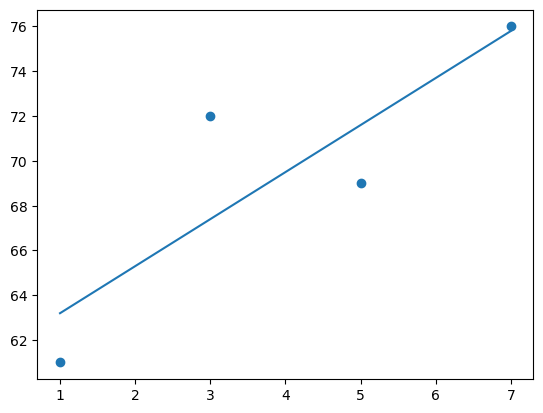

In [20]:
# 1
import numpy as np
import matplotlib.pyplot as plt
x = np.array([1, 3, 5, 7])
y = np.array([61, 72, 69, 76])
a, b = 0, 0
lr = 0.05
for i in range(1001):
    y_pred = a*x + b
    err = y - y_pred
    a_d = -sum(err*x)/4
    b_d = -sum(err)/4
    a = a - lr*a_d
    b = b - lr*b_d
    if i % 100 == 0:
        print('iter={}, a={}, b={}, err={}'.format(i, a, b, err.mean()))
plt.scatter(x, y)
plt.plot([min(x), max(x)], [a*min(x)+b, a*max(x)+b])
plt.show()

In [21]:
# 2
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
iris = sns.load_dataset('iris')
print(iris.head())
X = iris.drop('species', axis=1)
classle = LabelEncoder()
y = classle.fit_transform(iris['species'].values)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
print('학습데이터 스코어: {}'.format(accuracy_score(y_train, y_train_pred)))
print('시험데이터 스코어: {}'.format(accuracy_score(y_test, y_test_pred)))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
학습데이터 스코어: 0.9821428571428571
시험데이터 스코어: 0.9473684210526315


c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [22]:
# 3
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
iris = sns.load_dataset('iris')
print(iris.head())
X = iris.drop('species', axis = 1)
classle = LabelEncoder()
y = classle.fit_transform(iris['species'].values)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
Logit = LogisticRegression(C=1e2, multi_class='ovr', random_state=1)
l_1=Logit.fit(X_train_std, y_train)
y_train_pred = Logit.predict(X_train_std)
y_test_pred = Logit.predict(X_test_std)
print('학습데이터 스코어: {}'.format(accuracy_score(y_train, y_train_pred)))
print('시험데이터 스코어: {}'.format(accuracy_score(y_test, y_test_pred)))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
학습데이터 스코어: 0.9464285714285714
시험데이터 스코어: 0.9736842105263158


In [23]:
# 4
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=0)
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train, y_train)
y_train_pred = lda.predict(X_train)
y_test_pred = lda.predict(X_test)
print('학습데이터 스코어: {}'.format(accuracy_score(y_train, y_train_pred)))
print('시험데이터 스코어: {}'.format(accuracy_score(y_test, y_test_pred)))
print(confusion_matrix(y_test, y_test_pred))

학습데이터 스코어: 0.9651076466221232
시험데이터 스코어: 0.9511111111111111
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  1  0  0  0  1  1]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  1 41  0  0  0  0  1  2]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 45  0  0  0  3]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 47  0  1]
 [ 0  2  1  0  0  0  0  0 44  1]
 [ 0  0  0  0  0  0  0  2  2 43]]


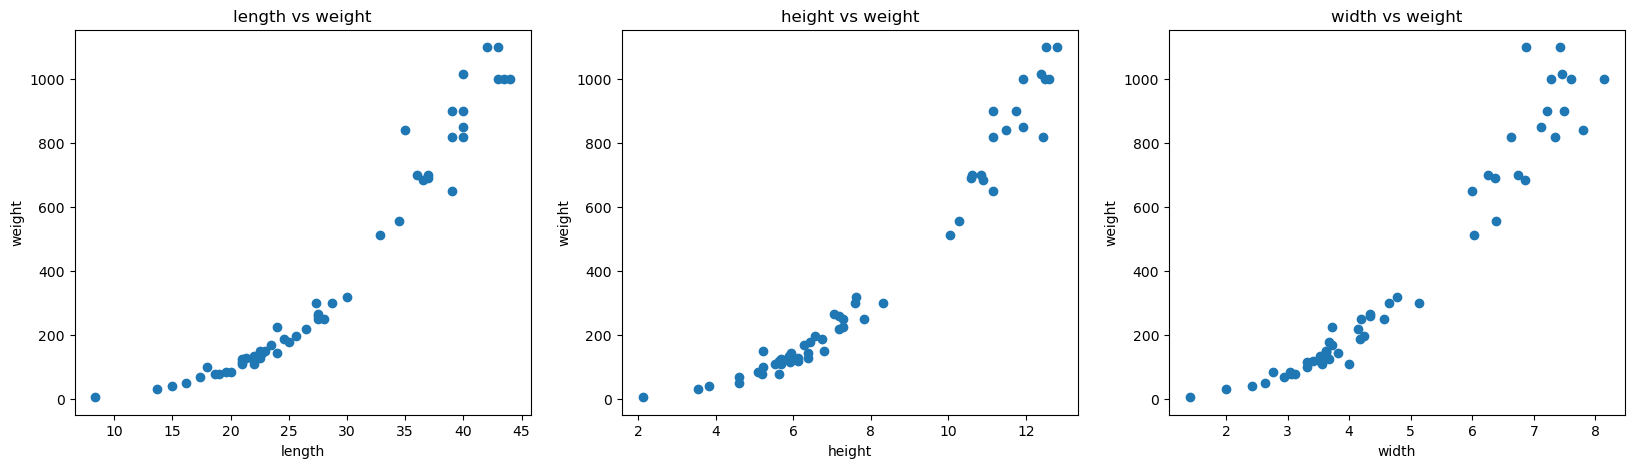

In [27]:
# 5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('perch_data.csv')
perch_data = df.to_numpy()
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )
plt.figure(figsize=(20,5))
for i, col in enumerate(df.columns):
    plt.subplot(1,3,i+1)
    plt.scatter(perch_data[:, i], perch_weight)
    plt.xlabel(col)
    plt.ylabel('weight')
    plt.title('{} vs weight'.format(col))
plt.show()

학습데이터 스코어: 0.9903183436982126
시험데이터 스코어: 0.9714559911594143
길이: 32, 높이: 9, 너비: 5.5 --> 무게: 427.84593267161046


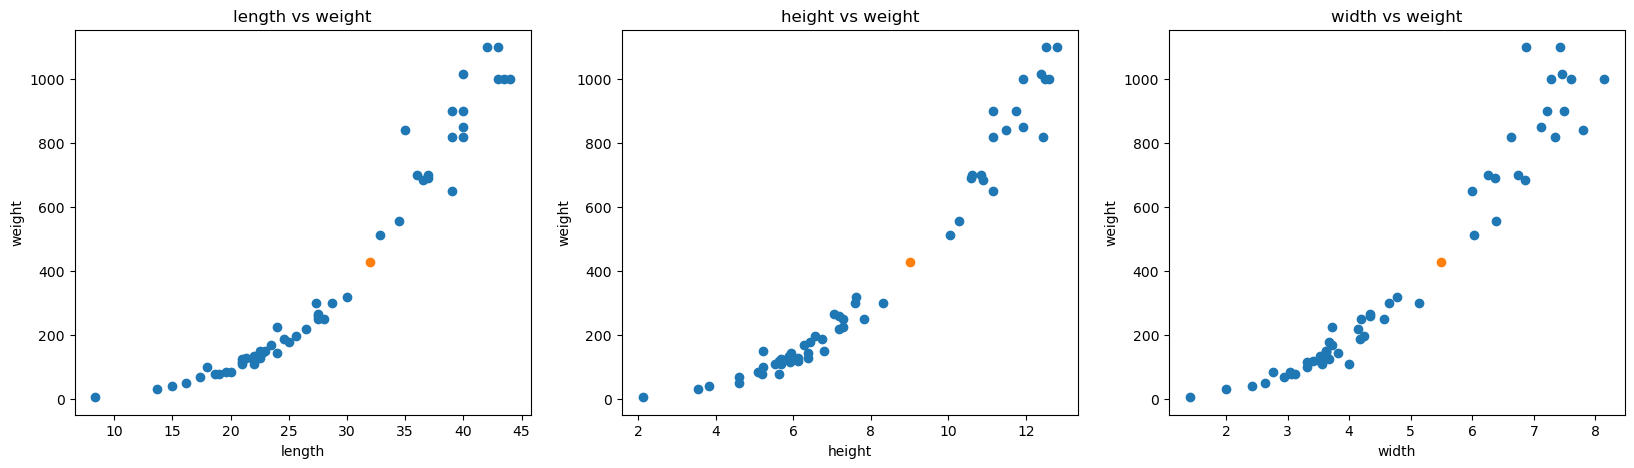

In [25]:
# 6
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
train_input, test_input, train_target, test_target = \
    train_test_split(perch_data, perch_weight, random_state=42)
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
lr = LinearRegression()
lr.fit(train_poly, train_target)
print('학습데이터 스코어: {}'.format(lr.score(train_poly, train_target)))
print('시험데이터 스코어: {}'.format(lr.score(test_poly, test_target)))
x = [32, 9, 5.5]
y = lr.predict(poly.transform([x]))
print('길이: {}, 높이: {}, 너비: {} --> 무게: {}'.format(*x, *y))
plt.figure(figsize=(20, 5))
for i, col in enumerate(df.columns):
    plt.subplot(1,3,i+1)
    plt.scatter(perch_data[:, i], perch_weight)
    plt.scatter(x[i], y)
    plt.xlabel(col)
    plt.ylabel('weight')
    plt.title('{} vs weight'.format(col))
plt.show()


학습데이터 스코어: 0.989789897208096
시험데이터 스코어: 0.9800593698421886
길이: 32, 높이: 9, 너비: 5.5 --> 무게: 424.95631799284024


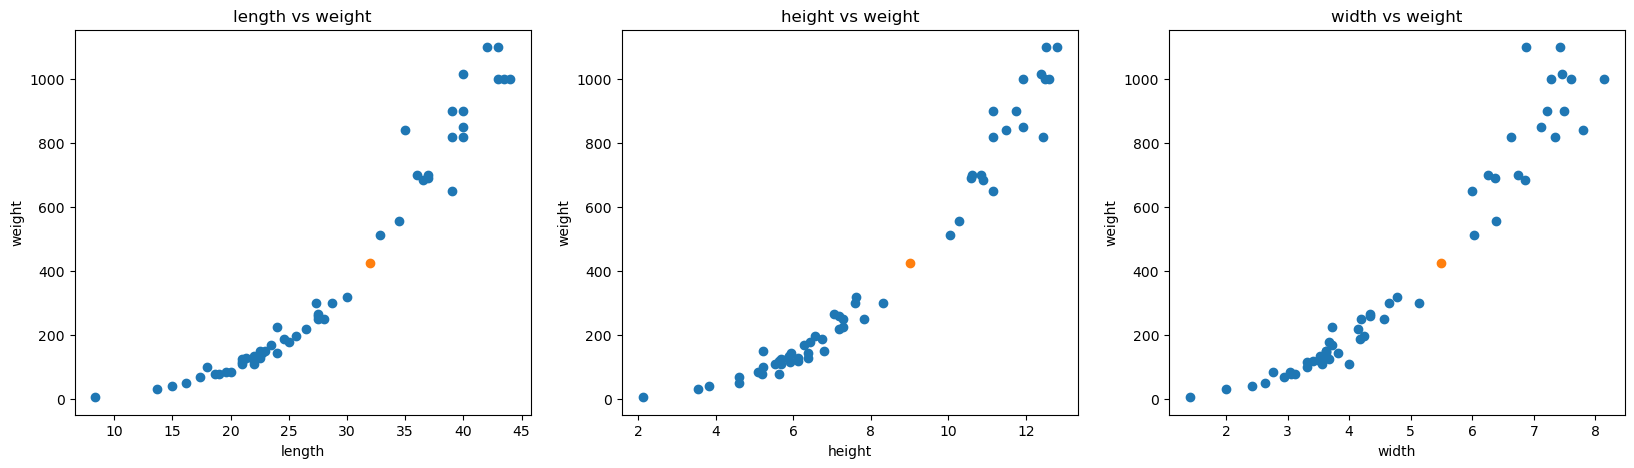

In [26]:
# 7
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
train_input, test_input, train_target, test_target = \
    train_test_split(perch_data, perch_weight, random_state=42)
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
ss = StandardScaler()
ss.fit(train_poly, train_target)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print('학습데이터 스코어: {}'.format(lasso.score(train_scaled, train_target)))
print('시험데이터 스코어: {}'.format(lasso.score(test_scaled, test_target)))
x = [32, 9, 5.5]
y = lasso.predict(ss.transform(poly.transform([x])))
print('길이: {}, 높이: {}, 너비: {} --> 무게: {}'.format(*x, *y))
plt.figure(figsize=(20, 5))
for i, col in enumerate(df.columns):
    plt.subplot(1,3,i+1)
    plt.scatter(perch_data[:, i], perch_weight)
    plt.scatter(x[i], y)
    plt.xlabel(col)
    plt.ylabel('weight')
    plt.title('{} vs weight'.format(col))
plt.show()
